# The Higgins-Selkov model

This is a visualization of the Higgins-Selkov model of [Glycolytic Oscillations](https://en.wikipedia.org/wiki/Glycolytic_oscillation).

The Higgins-Selkov model is governed by the following system of ODEs:

$$
\begin{align}
\dot{S} &= v_0-k_1 P^2 S \\
\dot{P} &= k_1 P^2 S - k_2 P \\
\end{align}
$$


## Running this notebook

This notebook can be run interactively at http://mybinder.org/repo/mhlr/notebooks/Higgins-Selkov.ipynb
There select *Cell -> Run All* in the toolbar to make the visualization interactive. The startup takes time simce Binder has to create a new container.

If you are running an IPython notebook server, you can dowload this notebook and run it locally.

## Imports

In [1]:
%pylab inline

from ipywidgets import interact, RadioButtons
#plt.style.use('seaborn-colorblind')
#plt.style.use('seaborn-notebook')
plt.style.use('ggplot')

#import mpld3
#mpld3.enable_notebook()

import pandas as pd
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


## Model Equations

In [2]:
def dS(S,P,v0,k1,k2):
    return v0-k1*(P**2)*S

def dP(S,P,v0,k1,k2):
    return k1*(P**2)*S - k2*P

def dSP(y,t,*rest):
    return array([dS(y[0], y[1], *rest),
                  dP(y[0], y[1], *rest)])

    
def solve(v0,k1,k2,S0,P0,tmax,tdelta):
    sol=odeint(dSP, array([S0, P0]), linspace(0,tmax,tdelta), (v0,k1,k2))
    S = sol[:,0]
    P = sol[:,1]
    return S, P

## Display Functions

In [3]:
Smin, Smax, Sdelta = (0., 2., 15)
Pmin, Pmax, Pdelta = (0., 2., 15)
    
def path(v0,k1,k2,S0,P0,tmax,tdelta):
    S, P = solve(v0,k1,k2,S0,P0,tmax,tdelta)
    init()
    plot(S, P, color="black")
    
def vectors(v0,k1,k2):
    S, P, ds, dp, speed = grid(v0,k1,k2)
    quiver(S, P, ds, dp, speed, pivot="mid")

def streamlines(v0,k1,k2):
    S, P, ds, dp, speed = grid(v0,k1,k2)
    streamplot(x=S, y=P, u=ds, v=dp, color=speed, linewidth=speed)

def init():
    figure(figsize(9,9))
    xlim(Smin,Smax)
    ylim(Pmin,Pmax)

def grid(v0,k1,k2):
    S, P = np.meshgrid(linspace(Smin,Smax,Sdelta), linspace(Pmin,Pmax,Pdelta))
    ds=dS(S,P,v0,k1,k2)
    dp=dP(S,P,v0,k1,k2)
    speed=sqrt(ds**2+dp**2)
    return (S, P, ds, dp, speed)

## Interactive Visualization

Select *Cell -> Run All* in the tool bar to make interactive controls appear.

### Phase Plot

<function vectors at 0x7f9279fe8cf8>


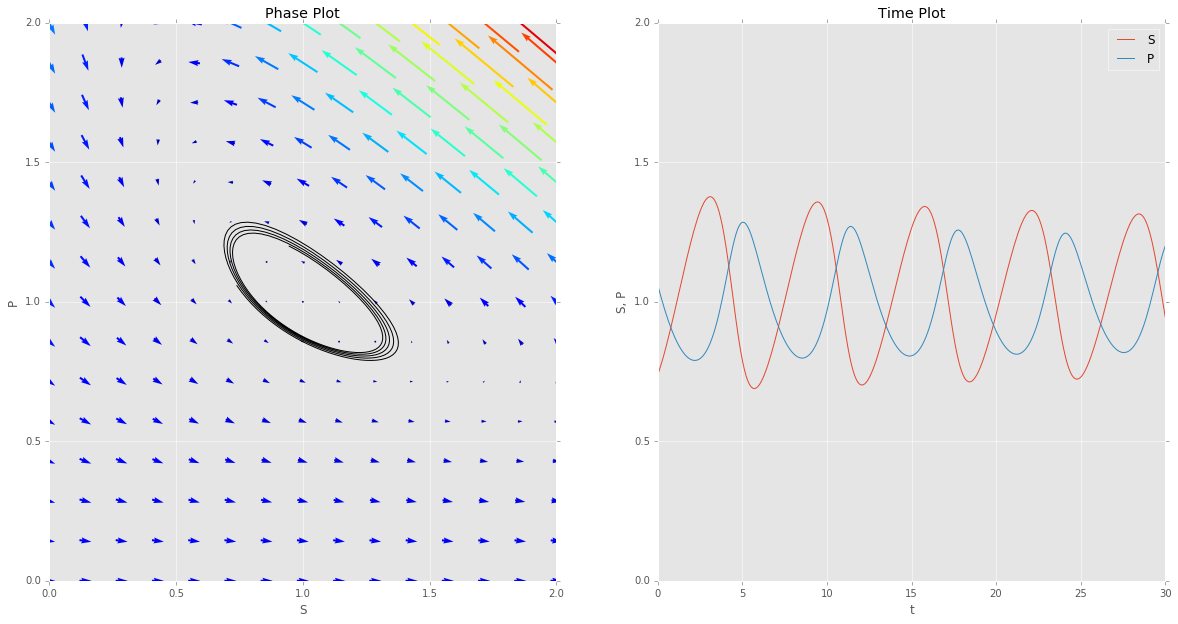

In [42]:
@interact
def render(field=RadioButtons(options=dict(vectors=vectors, streamlines=streamlines), selected_label="vectors"), v0=(0.9,1.105,0.005), k1=(0.9,1.105,0.005), k2=(0.9,1.105,0.005),
                  S0= (0.0, 2.005, 0.005), P0=(0.058,2.063,0.005),
                  tmax=30, tdelta=300):
    print field
    S, P = solve(v0,k1,k2,S0,P0,tmax,tdelta)
    t = linspace(0,tmax,tdelta)
    figure(figsize=(20,10))
    ax1 = subplot('121')
    ax1.set_title('Phase Plot')
    ax1.set_xlabel("S")
    ax1.set_ylabel("P")
    xlim(Smin,Smax)
    ylim(Pmin,Pmax)
    plot(S, P, color="black")
    field(v0,k1,k2)
    ax2 = subplot('122')
    ax2.set_title('Time Plot')
    ax2.set_xlabel("t")
    ax2.set_ylabel("S, P")
    xlim(0,tmax)
    ylim(min(Smin,Pmin),max(Smax,Pmax))
    plot(t,S, label="S")
    plot(t,P, label="P")
    legend()
    


## Further Reading

### John Baez on Azimuth
* https://johncarlosbaez.wordpress.com/2016/01/08/glycolysis/
* https://johncarlosbaez.wordpress.com/2016/01/18/glycolysis-part-2/

### Alan Rendall
* https://alanrendall.wordpress.com/2012/01/21/albert-goldbeter-and-glycolytic-oscillations/
* https://alanrendall.wordpress.com/2014/05/14/the-higgins-selkov-oscillator/

### Original Selkov paper
* http://www.medicine.mcgill.ca/physio/mackeylab/courses_mackey/pdf_files/selkov-68.pdf

### An implementation by Mike Martin
* http://math.jccc.edu:8180/webMathematica/JSP/mmartin/higginsselkov.jsp